In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_csv('loan.csv')

In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [48]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

DATA CLEANING

In [49]:
df['Gender'].mode()

0    Male
dtype: object

In [50]:
df['Gender']=df['Gender'].fillna('Male')


In [51]:
df['Married'].mode()

0    Yes
dtype: object

In [52]:
df['Married']=df['Married'].fillna('Yes')


In [53]:
df['Dependents'].mode()

0    0
dtype: object

In [54]:
df['Dependents']=df['Dependents'].fillna("0")


In [55]:
df['Self_Employed'].mode()

0    No
dtype: object

In [56]:
df['Self_Employed']=df['Self_Employed'].fillna('No')


In [57]:
df['LoanAmount'].mean()

146.41216216216216

In [58]:
df['LoanAmount']=df['LoanAmount'].fillna(146.4)

In [59]:
df['Loan_Amount_Term'].mean()

342.0

In [60]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(342.0)

In [61]:
df['Credit_History'].mean()

0.8421985815602837

In [62]:
df['Credit_History']=df['Credit_History'].fillna(0.8)

In [63]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [64]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

In [66]:
df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Dependents"] = le.fit_transform(df["Dependents"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])


In [67]:
df = df.drop(columns = ["Loan_ID"])

In [68]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.4,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [69]:
x=df.drop(columns=["Loan_Status"])
y=df["Loan_Status"]

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [72]:
sc = StandardScaler()
sc_x_train = sc.fit_transform(x_train)
sc_x_test = sc.fit_transform(x_test)

In [73]:
print(x_train.shape,y_train.shape)

(491, 11) (491,)


In [74]:
from keras.models import Sequential
from keras.layers import Dense

In [81]:
model=Sequential()
#3 layers 
model.add(Dense(12,activation="relu",input_dim=11))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 285
Trainable params: 285
Non-trainable params: 0
_________________________________________________________________


In [82]:
#binary entropy hinge, squared hinge loss
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [93]:
# Fit the model
history=model.fit(sc_x_train,y_train, epochs=30, batch_size=20)

Epoch 1/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8065
Epoch 2/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8065
Epoch 3/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.8065
Epoch 4/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8065
Epoch 5/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.8065
Epoch 6/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8065
Epoch 7/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8065
Epoch 8/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8065
Epoch 9/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8065
Epoch 10/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8045
Epoch 11/30
25/25 [

In [95]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

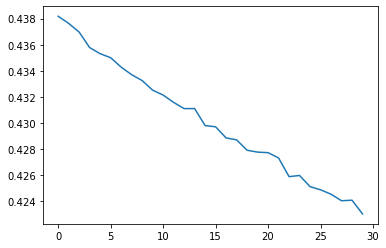

In [96]:
plt.plot(history.history["loss"])

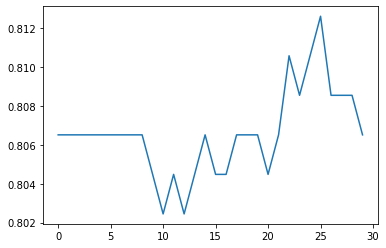

In [97]:
plt.plot(history.history["accuracy"])

In [99]:
loss, acc = model.evaluate(sc_x_train,y_train)

16/16 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.8126


In [100]:
loss

0.4218664765357971

In [101]:
acc

0.8126273155212402